# Ollama Embeddings 
* Ollama is a powerful tool that enables users to run large language models (LLMs) locally. It's designed to make it easy to use and access these models without needing deep technical knowledge. Ollama offers several key features:

* Local Deployment: This means you can run LLMs on your own device, ensuring privacy and control over your data.
* Multi-Model Support: Ollama supports a variety of popular LLM models, allowing you to choose the best one for your needs.
* Ease of Use: The user interface is intuitive, making it simple to get started and use Ollama effectively.
* Scalability: Ollama can be configured to optimize performance based on your hardware and model requirements.
* Open Source: The code is fully open, allowing users to view, modify, and distribute it.

Ollama supports embedding models, making it possible to build retrieval augmented generation (RAG) applications that combine text prompts with existing documents or other data.

What are embedding models?
Embedding models are models that are trained specifically to generate vector embeddings: long arrays of numbers that represent semantic meaning for a given sequence of text:

what-are-embedding-models

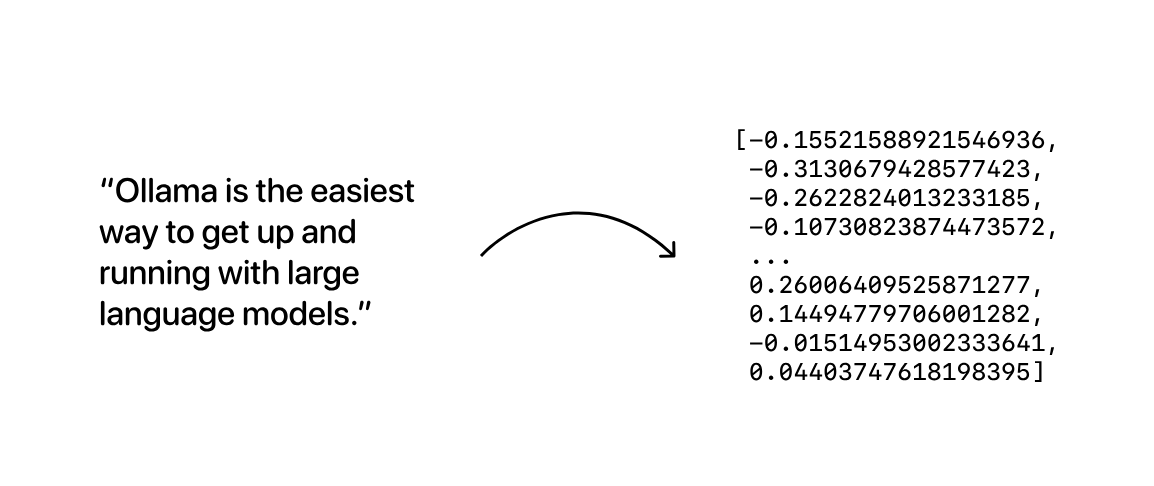

# Example embedding models
* mxbai-embed-large
* nomic-embed-text
* all-minilm

# Usage
* To generate vector embeddings, first pull a model:
- ollama pull mxbai-embed-large

In [1]:
from langchain_community.embeddings import OllamaEmbeddings

In [2]:
embeddings= OllamaEmbeddings(model="gemma2:2b")#by deafualt it will use llama2
embeddings

OllamaEmbeddings(base_url='http://localhost:11434', model='gemma2:2b', embed_instruction='passage: ', query_instruction='query: ', mirostat=None, mirostat_eta=None, mirostat_tau=None, num_ctx=None, num_gpu=None, num_thread=None, repeat_last_n=None, repeat_penalty=None, temperature=None, stop=None, tfs_z=None, top_k=None, top_p=None, show_progress=False, headers=None, model_kwargs=None)

In [3]:
# Example texts to embed
text_embeddings = [
    "The quick brown fox jumps over the lazy dog",
    "Machine learning is a subset of artificial intelligence",
    "Natural language processing helps computers understand human language",
    "Vector databases store and retrieve high-dimensional vectors efficiently"
]

In [5]:
embedded_vectors=embeddings.embed_documents(text_embeddings)
embedded_vectors

[[-0.7755571603775024,
  0.333949476480484,
  -2.3621151447296143,
  1.095248818397522,
  0.1125340536236763,
  1.152198076248169,
  -1.162233829498291,
  -0.023436414077878,
  0.5418604612350464,
  0.021518701687455177,
  -1.0062099695205688,
  -1.7641630172729492,
  0.17064014077186584,
  1.3966351747512817,
  -0.1649124175310135,
  1.3119992017745972,
  -2.017512083053589,
  0.05619645118713379,
  -7.447999954223633,
  0.5744695067405701,
  1.3034255504608154,
  -1.2306545972824097,
  -0.1014680340886116,
  -0.7143211960792542,
  1.6755099296569824,
  0.44410082697868347,
  -1.0015385150909424,
  1.4276635646820068,
  0.12189503014087677,
  0.355761855840683,
  -1.34688401222229,
  -1.7377738952636719,
  0.7632445096969604,
  0.11814083904027939,
  0.986933708190918,
  1.8191514015197754,
  -0.4184367060661316,
  0.666420578956604,
  -0.2335149347782135,
  -1.4151896238327026,
  0.3211970329284668,
  0.7423467040061951,
  0.6966423392295837,
  0.09302053600549698,
  0.70292413234710

In [9]:
len(embedded_vectors[1])

2304

In [10]:
print(f"Generated {len(embedded_vectors)} embeddings")
print(f"Each embedding has {len(embedded_vectors[0])} dimensions")

Generated 4 embeddings
Each embedding has 2304 dimensions


In [14]:
# Generate embedding for a single text
single_query = "What is Generative AI and what are its benefits?"
query_embedding = embeddings.embed_query(single_query)
print(f"Query embedding dimensions: {len(query_embedding)}")

Query embedding dimensions: 2304


* ChromaDB is an open-source embedding database (vector store) designed to make it easy to build AI 
applications with embeddings. 
* It's particularly popular for its:
1. Ease of use
2. Speed and efficiency
3. Built-in embedding support
4. Rich querying capabilities
5. Persistent storage

* Chroma organizes embeddings into collections
You can have multiple collections in the same database
Collections can be managed separately

In [16]:

from langchain_community.vectorstores import Chroma
import chromadb
persist_directory = "chroma_db"

In [33]:
# Create metadata for each document
metadata_list = [
    {"topic": "ML", "relevance": "high", "category": "basics"},
    {"topic": "DL", "relevance": "medium", "category": "advanced"},
    {"topic": "NLP", "relevance": "medium", "category": "applications"},
    {"topic": "databases", "relevance": "low", "category": "tools"},
]


In [34]:
# Create new vector store with metadata
vector_store = Chroma.from_texts(
    texts=text_embeddings,
    embedding=embeddings,
    metadatas=metadata_list,
    persist_directory="chroma_db_with_metadata",
    collection_name="ml_collection"
)

In [35]:
vector_store

In [36]:
# Perform similarity search
search_query = "What is ML?"
results = vector_store.similarity_search(search_query, k=4)
results

[Document(metadata={'category': 'tools', 'relevance': 'low', 'topic': 'databases'}, page_content='Vector databases store and retrieve high-dimensional vectors efficiently'),
 Document(metadata={'category': 'advanced', 'relevance': 'medium', 'topic': 'DL'}, page_content='Machine learning is a subset of artificial intelligence'),
 Document(metadata={'category': 'applications', 'relevance': 'medium', 'topic': 'NLP'}, page_content='Natural language processing helps computers understand human language'),
 Document(metadata={'category': 'basics', 'relevance': 'high', 'topic': 'ML'}, page_content='The quick brown fox jumps over the lazy dog')]

In [37]:
# Method 1: Basic similarity search
print("\nBasic Similarity Search Results:")
results = vector_store.similarity_search(search_query, k=4)
for i, doc in enumerate(results, 1):
    print(f"\nResult {i}:")
    print(f"Content: {doc.page_content}")
    print(f"Metadata: {doc.metadata}")


Basic Similarity Search Results:

Result 1:
Content: Vector databases store and retrieve high-dimensional vectors efficiently
Metadata: {'category': 'tools', 'relevance': 'low', 'topic': 'databases'}

Result 2:
Content: Machine learning is a subset of artificial intelligence
Metadata: {'category': 'advanced', 'relevance': 'medium', 'topic': 'DL'}

Result 3:
Content: Natural language processing helps computers understand human language
Metadata: {'category': 'applications', 'relevance': 'medium', 'topic': 'NLP'}

Result 4:
Content: The quick brown fox jumps over the lazy dog
Metadata: {'category': 'basics', 'relevance': 'high', 'topic': 'ML'}


In [38]:
#Method 2: Search with metadata filtering
print("\nFiltered Search Results (only high relevance):")
filtered_results = vector_store.similarity_search(
    search_query,
    k=4,
    filter={"relevance": "high"}
)
for i, doc in enumerate(filtered_results, 1):
    print(f"\nResult {i}:")
    print(f"Content: {doc.page_content}")
    print(f"Metadata: {doc.metadata}")


Filtered Search Results (only high relevance):

Result 1:
Content: The quick brown fox jumps over the lazy dog
Metadata: {'category': 'basics', 'relevance': 'high', 'topic': 'ML'}


In [39]:
# Example 2: Search with topic filter
print("\nSearching for ML-related documents:")
ml_results = vector_store.similarity_search(
    "What is ML?",
    k=4,
    filter={"topic": "ML"}
)


Searching for ML-related documents:


In [40]:
for i, doc in enumerate(ml_results, 1):
    print(f"\nResult {i}:")
    print(f"Content: {doc.page_content}")
    print(f"Metadata: {doc.metadata}")



Result 1:
Content: The quick brown fox jumps over the lazy dog
Metadata: {'category': 'basics', 'relevance': 'high', 'topic': 'ML'}
